In [86]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [87]:
print(tf.__version__)

2.8.2


In [88]:
import random
random.seed(0) #Initialize the random number generator
import warnings
warnings.filterwarnings('ignore')

In [89]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout,BatchNormalization
from tensorflow.keras.utils import to_categorical

In [90]:
from tensorflow.keras.datasets import fashion_mnist

In [91]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

In [92]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [93]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [94]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [95]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [96]:
X_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

Label:1


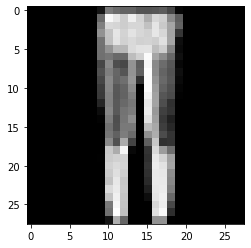

In [97]:
import matplotlib.pyplot as plt
print("Label:{}".format(y_test[3]))
plt.imshow(X_test[3],cmap='gray')

In [98]:
#Reshaping of data
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [99]:
X_train[0].shape

(28, 28, 1)

In [100]:
#Normalize data 
X_train = X_train.astype('float')
X_test = X_test.astype('float')
X_train = X_train/255
X_test = X_test/255

In [101]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [102]:
print(X_train.min())
print(X_train.max())
print(X_test.min())
print(X_test.max())

0.0
1.0
0.0
1.0


In [103]:
#One hot encode
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)

In [104]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [105]:
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [106]:
y_train.shape

(60000, 10)

In [107]:
y_test.shape

(10000, 10)

# Creating CNN

In [108]:
model = Sequential()
#Add 1st convolution layer
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
#2nd Convolution
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
#Flatten layer
model.add(Flatten())
#Add NN 
model.add(Dense(128,activation='relu'))
#Dropout layer
model.add(Dropout(0.5))
#Output Layer
model.add(Dense(10,activation='softmax'))

In [109]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [110]:
import visualkeras

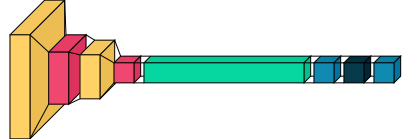

In [111]:
#CNN Visualization
visualkeras.layered_view(model)

In [112]:
pip install plot_model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [113]:
from plot_model import plot_model

In [114]:
#plot_model(model,to_file='model.png')

In [115]:
#Compile the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [116]:
hist = model.fit(X_train,y_train,batch_size=32,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 88s 47ms/step - loss: 0.5535 - accuracy: 0.7994 - val_loss: 0.3701 - val_accuracy: 0.8684
Epoch 2/10
1875/1875 [==============================] - 76s 41ms/step - loss: 0.3697 - accuracy: 0.8660 - val_loss: 0.3261 - val_accuracy: 0.8783
Epoch 3/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.3230 - accuracy: 0.8825 - val_loss: 0.3240 - val_accuracy: 0.8779
Epoch 4/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.2926 - accuracy: 0.8937 - val_loss: 0.2741 - val_accuracy: 0.8965
Epoch 5/10
1875/1875 [==============================] - 65s 34ms/step - loss: 0.2686 - accuracy: 0.9025 - val_loss: 0.2679 - val_accuracy: 0.8998
Epoch 6/10
1875/1875 [==============================] - 65s 34ms/step - loss: 0.2523 - accuracy: 0.9076 - val_loss: 0.2679 - val_accuracy: 0.9012
Epoch 7/10
1875/1875 [==============================] - 65s 34ms/step - loss: 0.2349 - accuracy: 0.9125 - val_loss: 0.2547 -

In [117]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.2535 - accuracy: 0.9102


[0.25347793102264404, 0.9101999998092651]

# Tuning the model

In [118]:
model1 = Sequential()
model1.add(Conv2D(32,3,padding='same',kernel_initializer='he_normal',input_shape=(28,28,1),activation='relu'))
model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model1.add(Conv2D(64,3,padding='same',activation='relu'))
model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.3))
model1.add(BatchNormalization())
model1.add(Conv2D(128,3,padding='same',activation='relu'))
model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.4))
model1.add(Flatten())
model1.add(BatchNormalization())
model1.add(Dense(512,activation='relu'))
model1.add(Dropout(0.25))
model1.add(Dense(10,activation='softmax'))

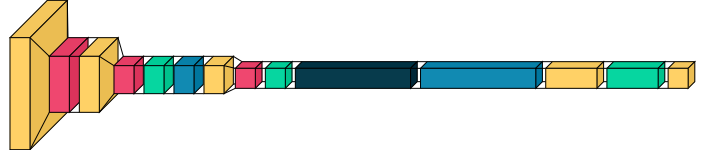

In [119]:
visualkeras.layered_view(model1)

In [ ]:
visualkeras.layered_view(model)

# Tweak the optimizer and the learning rate

In [120]:
optimizer = Adam(lr=0.001,beta_1=0.9,beta_2=0.999,epsilon=None,decay=0.0,amsgrad=False)

In [122]:
model1.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
hist1 = model1.fit(X_train,y_train,batch_size=128,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
469/469 [==============================] - 117s 246ms/step - loss: 0.5580 - accuracy: 0.8012 - val_loss: 0.3676 - val_accuracy: 0.8696
Epoch 2/10
469/469 [==============================] - 112s 240ms/step - loss: 0.3659 - accuracy: 0.8658 - val_loss: 0.3071 - val_accuracy: 0.8855
Epoch 3/10
469/469 [==============================] - 112s 238ms/step - loss: 0.3143 - accuracy: 0.8849 - val_loss: 0.2838 - val_accuracy: 0.8972
Epoch 4/10
469/469 [==============================] - 112s 238ms/step - loss: 0.2865 - accuracy: 0.8925 - val_loss: 0.2820 - val_accuracy: 0.8958
Epoch 5/10
469/469 [==============================] - 112s 238ms/step - loss: 0.2735 - accuracy: 0.8989 - val_loss: 0.2447 - val_accuracy: 0.9102
Epoch 6/10
469/469 [==============================] - 110s 234ms/step - loss: 0.2590 - accuracy: 0.9044 - val_loss: 0.2622 - val_accuracy: 0.9046
Epoch 7/10
469/469 [==============================] - 111s 237ms/step - loss: 0.2492 - accuracy: 0.9079 - val_loss: 0.2493 -